# Homework 3: SVM

## 1.

In [23]:
!pip install libsvm-3.23-cp37-cp37m-win_amd64.whl
import svm
from svmutil import *

In [24]:
y, x = svm_read_problem('./HW3_data/1/promoters/training.txt')
y_test, x_test = svm_read_problem('./HW3_data/1/promoters/test.txt')

In [25]:
prob = svm_problem(y, x, isKernel=True)
param = svm_parameter('-t 0')
m = svm_train(prob, param)
svm_save_model('kernel_0.model', m)
m = svm_load_model('kernel_0.model')
p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
ACC, MSE, SCC = evaluations(y_test, p_label)

Accuracy = 84.375% (27/32) (classification)


In [26]:
prob = svm_problem(y, x, isKernel=True)
param = svm_parameter('-t 1')
m = svm_train(prob, param)
svm_save_model('kernel_1.model', m)
m = svm_load_model('kernel_1.model')
p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
ACC, MSE, SCC = evaluations(y_test, p_label)

Accuracy = 81.25% (26/32) (classification)


In [27]:
prob = svm_problem(y, x, isKernel=True)
param = svm_parameter('-t 2')
m = svm_train(prob, param)
svm_save_model('kernel_2.model', m)
m = svm_load_model('kernel_2.model')
p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
ACC, MSE, SCC = evaluations(y_test, p_label)

Accuracy = 90.625% (29/32) (classification)


In [28]:
prob = svm_problem(y, x, isKernel=True)
param = svm_parameter('-t 3')
m = svm_train(prob, param)
svm_save_model('kernel_3.model', m)
m = svm_load_model('kernel_3.model')
p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
ACC, MSE, SCC = evaluations(y_test, p_label)

Accuracy = 43.75% (14/32) (classification)


## 2.


![title](./analog_sols/2.jpg)

## 3.

![title](./analog_sols/3a.jpg)
![title](./analog_sols/3b.jpg)

## 4. a.

∏P(y(i)|x(i))

In [29]:
import random
import numpy as np

def random_list(n, secure=True):
    random_floats = []
    if secure:
        crypto = random.SystemRandom()
        random_float = crypto.random
    else:
        random_float = random.random
    for _ in range(n):
        random_floats.append(random_float())
    return random_floats

In [43]:
def multiplyList(myList) : 
      
    # Multiply elements one by one 
    result = 1.0
    for x in myList: 
         result = result * x  
    return result

In [44]:
import datetime

rnd = random_list(10000000, secure=False)
rnd = np.array(rnd, dtype='float')
a = datetime.datetime.now()
result = multiplyList(rnd)
b = datetime.datetime.now()
time = b-a
result, float(time.total_seconds() * 1000)

(0.0, 2420.5519999999997)

(∑log(1 + exp(−y(i)(θ·x(i)+θ0))))/n ======= Using log functions to process the probabilities

In [45]:
rnd = random_list(10000000, secure=False)
rnd = np.log10(rnd)
result = 0 
a = datetime.datetime.now()
for i in rnd:
    result+=i
b = datetime.datetime.now()
time = b-a
result, float(time.total_seconds() * 1000)

(-4343731.609906569, 3251.353)

Computational Advantage of Equation 2 over Equation 1 is that Equation 2 is less expensive in terms of computational resources as many computers are designed to do addition better than multiplication. It is also noted that the time taken for the calculations may differ depending on the machine you are running but generally sum of logs are better in terms of accuracy in terms of closeness to the real value

## 4. b.

### Instructions to run the code: 

#### -  Make sure that you can read the jupyter notebook, and to run the code itself you only need to run the notebook
#### - Make sure that the necessary libraries are installed. This notebook does not require additional libraries than the ones needed
### 1. Restart Kernel and Run all if you are using jupyter notebook, or the equivalent.
### 2. To run the python file, 
        #### if you are using Windows, go to cmd and the directory of this file and run: 
        #### python logistic_regression.py
        
        #### if you are using a unix based system, got to your terminal and run:
        #### python logistic_regression.py

In [33]:
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv('./HW3_data/4/diabetes_train.csv', header = None)
y = df.iloc[:, :1]
x = df.iloc[:, 1:]

y = np.array(y,dtype='float64')

x = np.array(x,dtype='float64')

In [35]:
def n_cost_function(theta, x, y):
    '''
    X - dataframe for the training set
    y - dataframe for the actual set
    theta - features
    '''
#     ones = np.ones(shape=x.shape) #biases
#     X = np.hstack((x,ones))
    pred = np.dot(x, theta)  # 3000, 1 shape
    cost = np.log(1 + np.exp(np.multiply(-y, pred)))
    return cost.mean()

In [36]:
def n_likelihood_function(theta, x, y):
    '''
    X - dataframe for the training set
    y - dataframe for the actual set
    theta - features
    '''
#     ones = np.ones(shape=x.shape) #biases
#     X = np.hstack((x,ones))
    pred = np.dot(x, theta)  # 3000, 1 shape
    cost = np.log(1/(1 + np.exp(np.multiply(-y, pred))))
    return cost.mean()

In [37]:
def n_d_cost(theta, x, y):
    '''
    X - dataframe for the training set
    y - dataframe for the actual set
    theta - features
    update parameters: −y(t)x(t)/1 + exp(y(t)(θ·x(t)))
    '''
    top = np.multiply(-y, x)
    pred = np.dot(x, theta)
    bot = 1 + np.exp(np.multiply(y, pred))
    return (top/bot)

In [38]:
#     a = np.random.choice(range(n), n, replace=False)
from random import randrange
def n_sgd(arrx, arry,learning_rate=0.01, epochs=50):
    theta = np.zeros(shape=(21,1))
    ones = np.ones(shape = (3000,1))
    arrx_array = np.hstack((ones, arrx))
    arry_array = np.array(arry, dtype='float64')
    n = len(arrx)
    minloss = 10**10
    bestTheta = 0
    err = []  
    like = []
    for j in range(epochs): #This is for the number of training iteration.
        i = randrange(n)
        loss = n_cost_function(theta,arrx_array, arry_array)
        likelihood = n_likelihood_function(theta,arrx_array, arry_array)
        theta -= (learning_rate * n_d_cost(theta,arrx_array[i],arry_array[i]).reshape(21,1))      
        if loss < minloss:
            minloss = loss
            bestTheta = np.copy(theta)
        err.append(loss)
        like.append(likelihood)
        if (j + 1) % 100 == 0:
            # save weights of the function
            np.save(f'./models/model_{j+1}',theta, allow_pickle=True, fix_imports=True)
            print(f'>>> Model_{j+1} saved to models')
    return bestTheta , minloss, err, like

In [39]:
n_theta, n_loss, n_err, n_like = n_sgd(x,y,0.1,10000)

>>> Model_100 saved to models
>>> Model_200 saved to models
>>> Model_300 saved to models
>>> Model_400 saved to models
>>> Model_500 saved to models
>>> Model_600 saved to models
>>> Model_700 saved to models
>>> Model_800 saved to models
>>> Model_900 saved to models
>>> Model_1000 saved to models
>>> Model_1100 saved to models
>>> Model_1200 saved to models
>>> Model_1300 saved to models
>>> Model_1400 saved to models
>>> Model_1500 saved to models
>>> Model_1600 saved to models
>>> Model_1700 saved to models
>>> Model_1800 saved to models
>>> Model_1900 saved to models
>>> Model_2000 saved to models
>>> Model_2100 saved to models
>>> Model_2200 saved to models
>>> Model_2300 saved to models
>>> Model_2400 saved to models
>>> Model_2500 saved to models
>>> Model_2600 saved to models
>>> Model_2700 saved to models
>>> Model_2800 saved to models
>>> Model_2900 saved to models
>>> Model_3000 saved to models
>>> Model_3100 saved to models
>>> Model_3200 saved to models
>>> Model_3300 sa

--- Cost for every 100 iteration ---


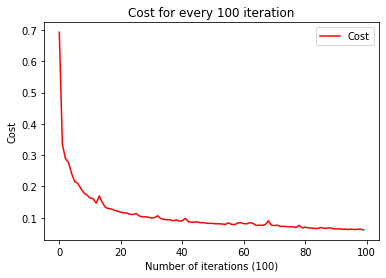

In [40]:
import matplotlib.pyplot as plt


print("--- Cost for every 100 iteration ---")
plt.title('Cost for every 100 iteration')
plt.ylabel('Cost')
plt.xlabel('Number of iterations (100)')
cost100 = n_err[0::100]
plt.plot(np.arange(0,len(cost100)),cost100[0:],'-r', label='Cost')
plt.legend()
plt.show()



--- Log-likelihood for every 100 iteration ---


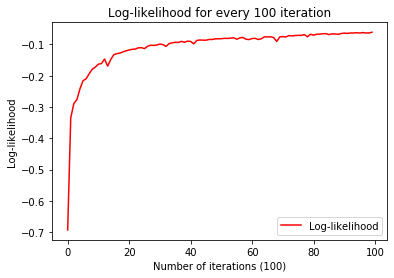

In [41]:
print("--- Log-likelihood for every 100 iteration ---")
plt.title('Log-likelihood for every 100 iteration')
plt.ylabel('Log-likelihood')
plt.xlabel('Number of iterations (100)')
like100 = n_like[0::100]
plt.plot(np.arange(0,len(like100)),like100[0:],'-r', label='Log-likelihood')
plt.legend()
plt.show()

In [42]:
n_theta

array([[ 6.69613140e-01],
       [ 2.42308308e+00],
       [-8.28505023e+00],
       [ 3.93896390e+00],
       [ 4.14784057e-03],
       [ 2.27842518e-01],
       [ 2.09486865e-01],
       [ 2.28135916e-01],
       [ 6.81584919e-02],
       [ 3.71030085e-02],
       [-2.77849981e-02],
       [ 1.36359934e-01],
       [ 1.11764542e-01],
       [ 4.09914413e-01],
       [-6.59022522e-02],
       [ 1.55002085e-01],
       [ 2.25235212e-01],
       [ 3.24306606e-01],
       [-3.49307632e-02],
       [-7.96978922e+00],
       [ 3.94871100e+00]])